In [3]:
import os

import matplotlib.pyplot as plt # visualization
import numpy as np # linear algebra
import pandas as pd # data processing

# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [4]:
df = pd.read_csv('data.csv')

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df[['Wage']].head(10)

# Работа с датафреймом

Заполните пропуски:

1. В датасете `88` переменных 
2. Из них числовых `43`

# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age [px.histogram](https://plotly.com/python/histograms/)
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [5]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


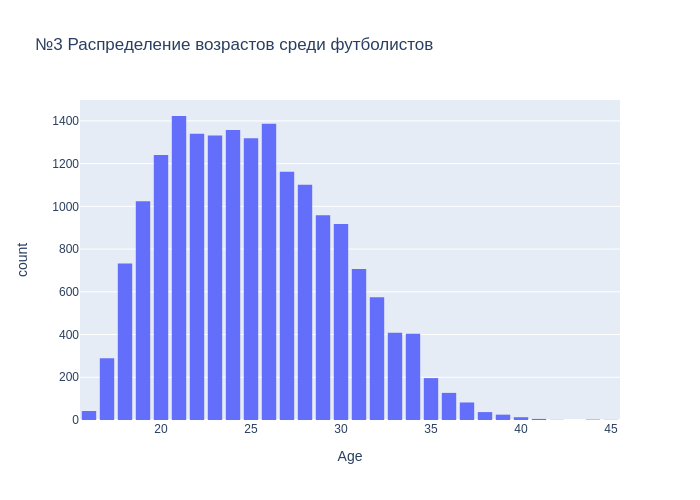

In [6]:
#Построение гистограммы
fig = px.histogram(df, x="Age", title="№3 Распределение возрастов среди футболистов")
fig.update_layout(bargap=0.2)
fig.show('png')

5. Найдите колонку, показывающую, является ли футболист левой или правшой
6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

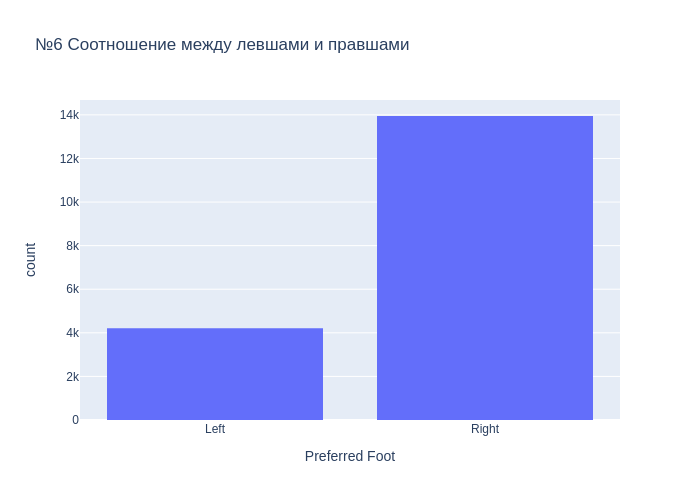

In [9]:
#Построение гистограммы
fig = px.histogram(df, x="Preferred Foot", title="№6 Соотношение между левшами и правшами")
fig.show('png')

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом? 

![Игроки](Players.png "Title")

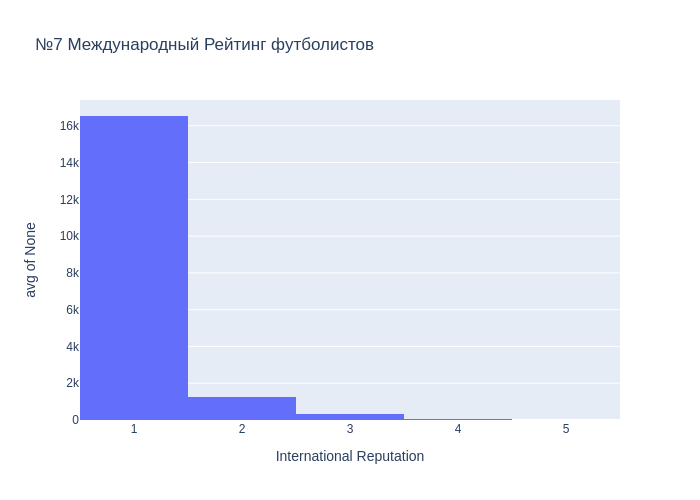

In [10]:
#Построение гистограммы
fig = px.histogram(df, x="International Reputation", histfunc = 'avg', title="№7 Международный Рейтинг футболистов")
fig.show('png')

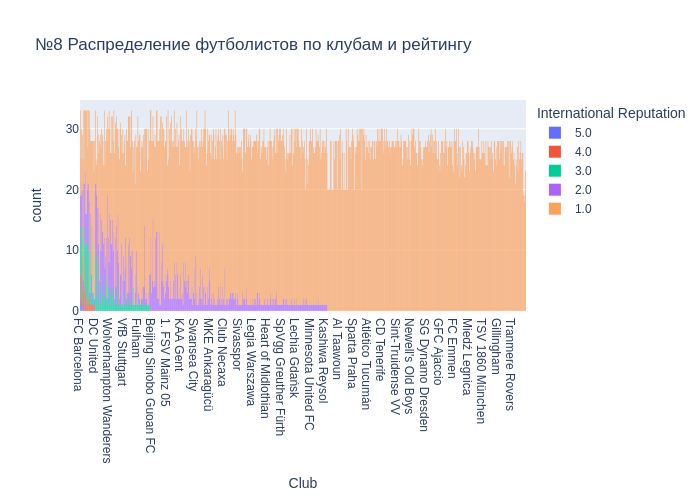

In [11]:
#Удаление строк со значением Nan
df_tmp=df.copy()
df_tmp=df_tmp[~df_tmp["International Reputation"].isna()]

#Построение гистограммы
fig = px.histogram(df_tmp, x="Club", color="International Reputation", title="№8 Распределение футболистов по клубам и рейтингу")
fig.update_layout(bargap=0.2)
fig.show('png')

№8 Международный рейтинг ассоциирован с футбольным клубом (только в небольшом количестве клубов есть игроки с рейтингом 4.0 и больше, в этих же клубах наибольшее количество игроков с рейтингом не меньше 2.0)

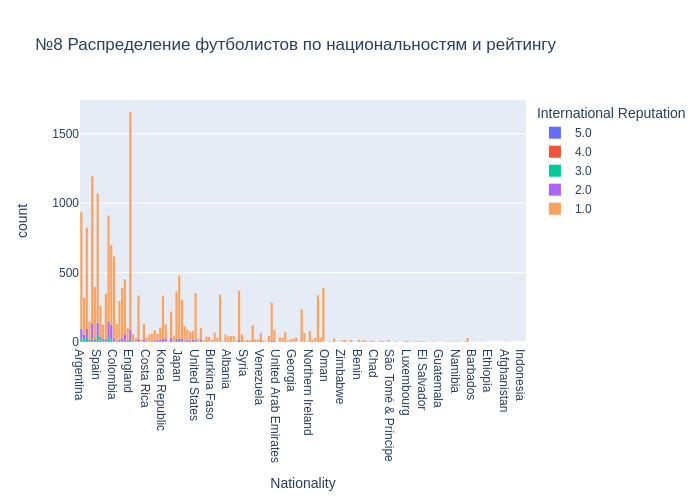

In [12]:
#Удаление строк со значением Nan
df_tmp=df.copy()
df_tmp=df_tmp[~df_tmp["International Reputation"].isna()]

#Построение гистограммы
df_tmp=df_tmp[~df_tmp["Nationality"].isna()]
fig = px.histogram(df_tmp, x="Nationality", color="International Reputation", title="№8 Распределение футболистов по национальностям и рейтингу")
fig.update_layout(bargap=0.2)
fig.show('png')

№8 Рейтинг ассоциирован с национальностью (среди игроков некоторых национальностей больше игроков с более высоким рейтингом)

9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

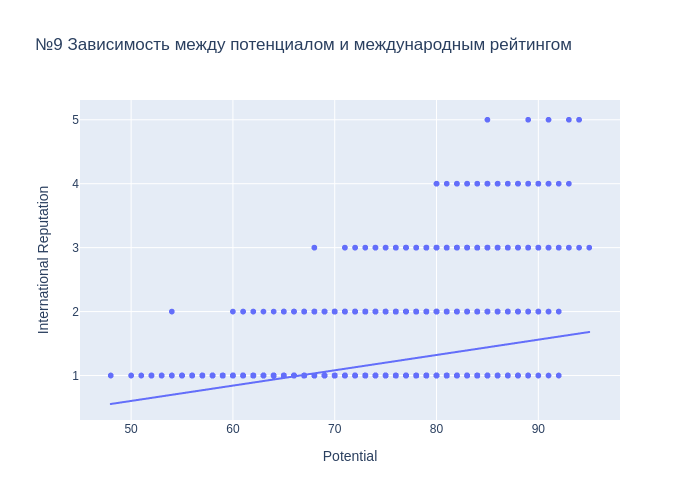

In [13]:
#Построение диаграммы рассеяния
fig = px.scatter(df, x="Potential", y="International Reputation", trendline="ols", title="№9 Зависимость между потенциалом и международным рейтингом")
fig.show('png')

№9 Зависимость есть: чем больше потенциал, тем больше рейтинг

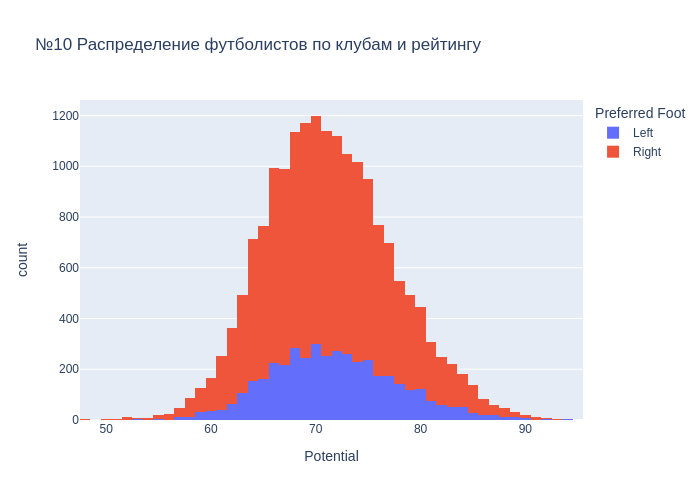

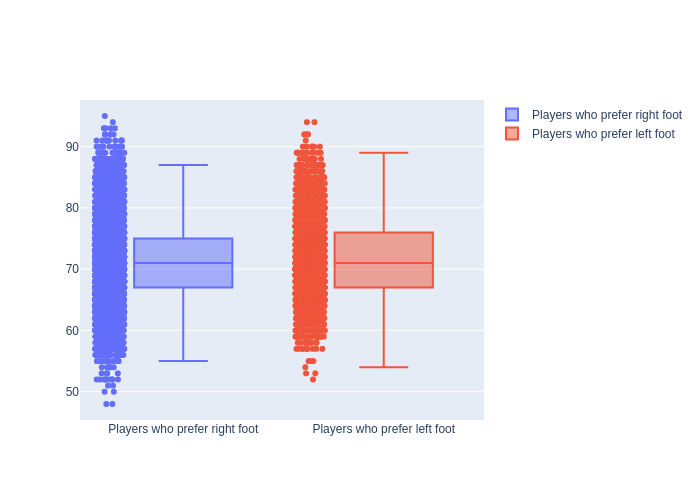

In [14]:
#Удаление строк со значением Nan
df_tmp=df.copy()
df_tmp=df_tmp[~df_tmp["Preferred Foot"].isna()]

#Построение гистограммы
fig = px.histogram(df_tmp, x="Potential", color="Preferred Foot", title="№10 Распределение футболистов по клубам и рейтингу")
fig.show('png')

#Построение диаграммы размаха
fig = go.Figure()
fig.add_trace(go.Box(y=df.loc[df['Preferred Foot']=="Right", "Potential"].tolist(), name="Players who prefer right foot", boxpoints='all'))
fig.add_trace(go.Box(y=df.loc[df['Preferred Foot']=="Left", "Potential"].tolist(), name="Players who prefer left foot", boxpoints='all'))
fig.show('png')

№10 На потенциал не влияет нога (среднее значение потенциала равно у правшей и левшей, самый частый потенциал у всех - 70)

Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость? 


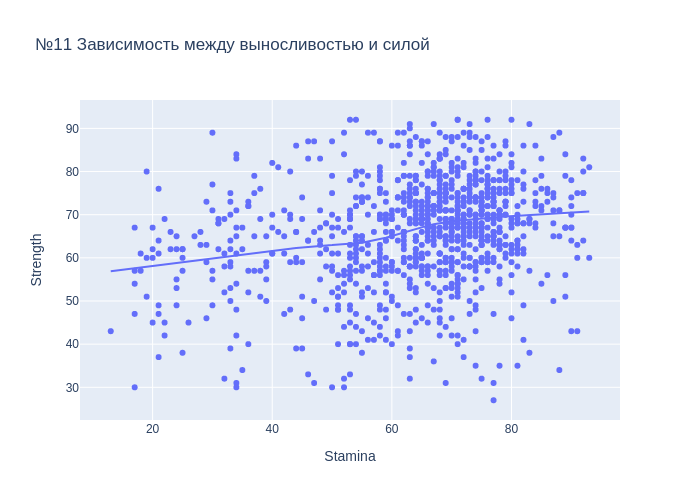

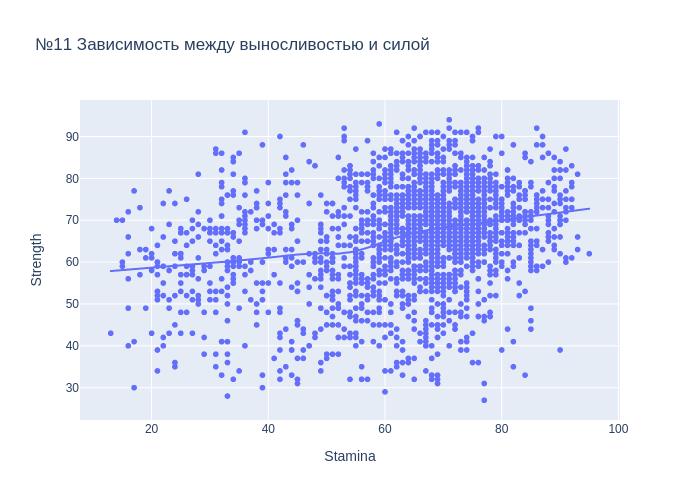

In [16]:
#Построение диаграммы рассеяния (1000 точек)
fig = px.scatter(df.sample(1000), x="Stamina", y="Strength", trendline="lowess", title="№11 Зависимость между выносливостью и силой")
fig.show('png')

#Построение диаграммы рассеяния (все точки)
fig = px.scatter(df.sample(2000), x="Stamina", y="Strength", trendline="lowess", title="№11 Зависимость между выносливостью и силой")
fig.show('png')

№11 Зависимости есть (при изменении количества точек зависимости остаются аналогичными)

12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

In [17]:
#Перевод стоимости игрока из строки в числовое значение
df_tmp=df.copy()
df_tmp['Value']=pd.to_numeric(df_tmp['Value'].str.replace("K", "000", regex=True).str.replace(r"[^\d\.]", "", regex=True), errors='coerce')
df_tmp.loc[df_tmp["Value"]<1000,"Value"] *= 1000000

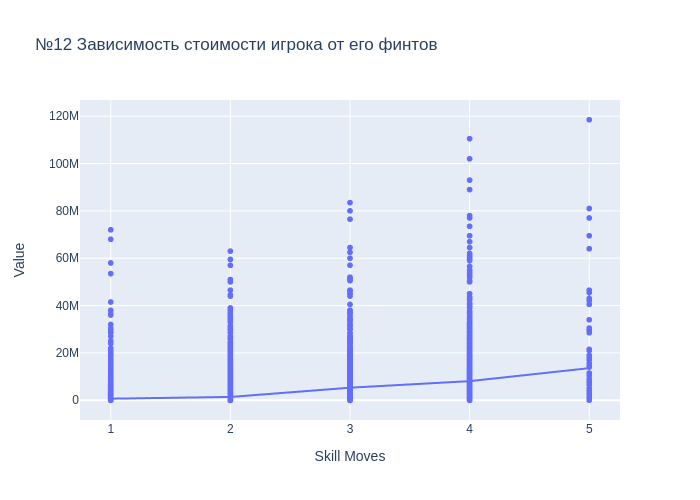

In [18]:
#Построение диаграммы рассеяния
fig = px.scatter(df_tmp, x="Skill Moves", y="Value", trendline="lowess", title="№12 Зависимость стоимости игрока от его финтов")
fig.show('png')

№12 Стоимость игрока зависит от его финтов 

13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

In [19]:
#Функция перевода футов и дюймов в сантиметры
def conv_to_sm(s):
  spl=s.split("'")
  return float(spl[0])*30.48+float(spl[1])*2.54

In [20]:
#Перевод роста игрока из футов в сантиметры
df_tmp=df.copy()
df_tmp=df_tmp[~df_tmp['Height'].isna()]
df_tmp["Height"]=df_tmp["Height"].apply(conv_to_sm)

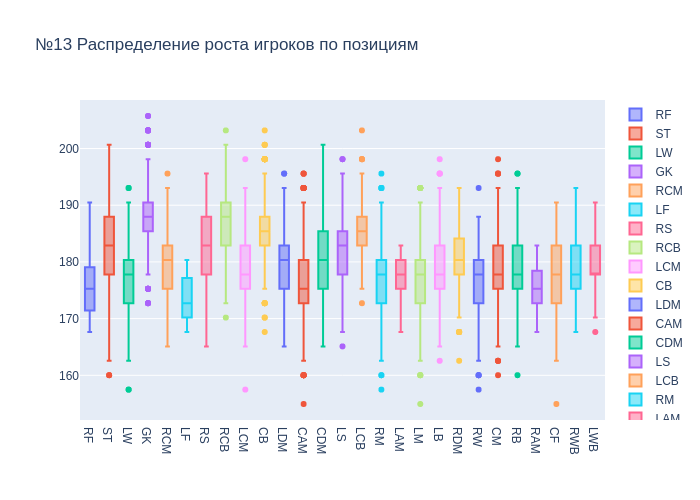

In [22]:
#Построение диаграммы размаха
fig = go.Figure(data=[go.Box(y=df_tmp.loc[df_tmp['Position']==df["Position"].unique().tolist()[i], "Height"].tolist(), name=df["Position"].unique().tolist()[i]) for i in range(0, len(df["Position"].unique().tolist()))])
fig.update_layout(title="№13 Распределение роста игроков по позициям")
fig.show('png')

In [23]:
#Перевод веса игрока в килограммы
df_tmp['Weight']=pd.to_numeric(df_tmp['Weight'].str.replace(r"[^\d\.]", "", regex=True), errors='coerce')
df_tmp.loc[:,"Weight"] *= 0.453592
df_tmp.loc[:,"Weight"]=round(df_tmp.loc[:,"Weight"])

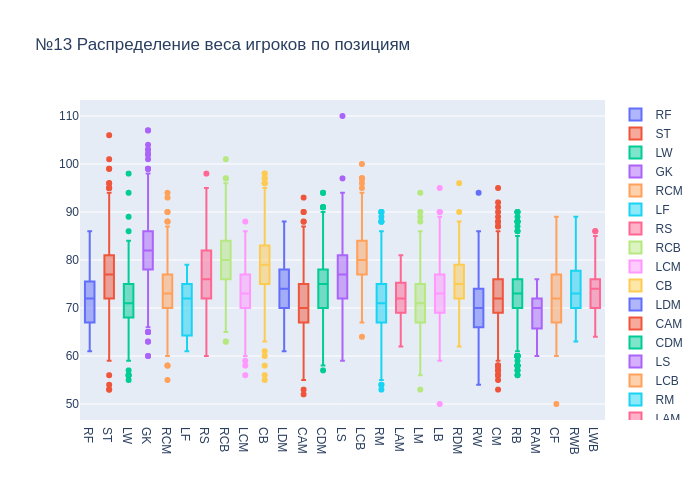

In [24]:
#Построение диаграммы размаха
fig = go.Figure(data=[go.Box(y=df_tmp.loc[df_tmp['Position']==df["Position"].unique().tolist()[i], "Weight"].tolist(), name=df["Position"].unique().tolist()[i]) for i in range(0, len(df["Position"].unique().tolist()))])
fig.update_layout(title="№13 Распределение веса игроков по позициям")
fig.show('png')

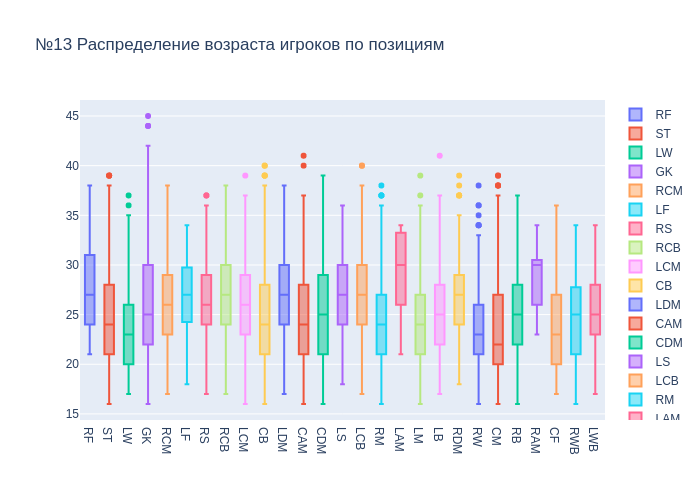

In [25]:
#Построение диаграммы размаха
fig = go.Figure(data=[go.Box(y=df_tmp.loc[df_tmp['Position']==df["Position"].unique().tolist()[i], "Age"].tolist(), name=df["Position"].unique().tolist()[i]) for i in range(0, len(df["Position"].unique().tolist()))])
fig.update_layout(title="№13 Распределение возраста игроков по позициям")
fig.show('png')

№13 Игроки с наибольшим средним ростом и весом стоят на позиции GK (голкипер), а игроки с наибольшим средним возрастом - LAM и RAM (атакующие полузацитники)

14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

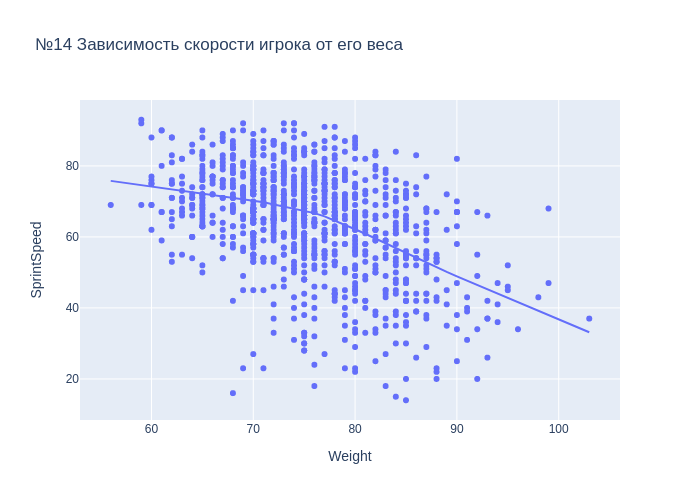

In [26]:
#Возьмем предыдущую df_tmp, где вес и рост уже переведены в числовые знаения

#Построение диаграммы рассеяния
fig = px.scatter(df_tmp.sample(1000), x="Weight", y="SprintSpeed", trendline="lowess", title="№14 Зависимость скорости игрока от его веса")
fig.show('png')

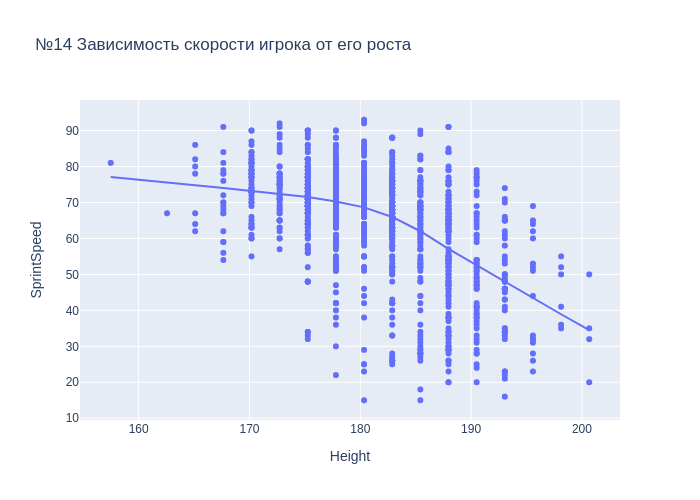

In [28]:
#Построение диаграммы рассеяния
fig = px.scatter(df_tmp.sample(1000), x="Height", y="SprintSpeed", trendline="lowess", title="№14 Зависимость скорости игрока от его роста")
fig.show('png')

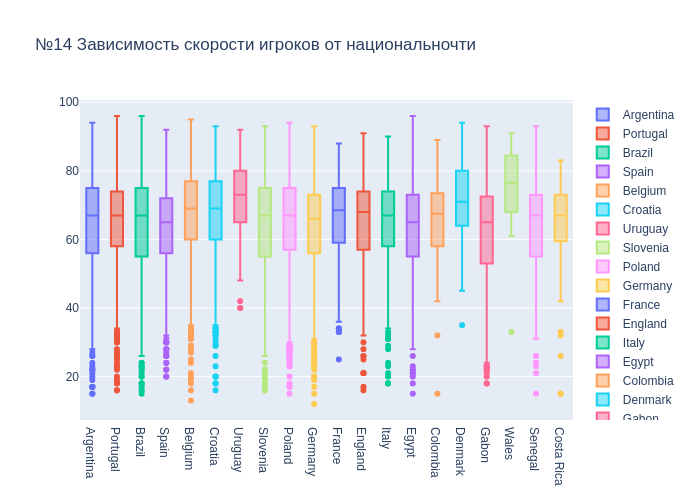

In [34]:
#Построение диаграммы размаха
nation=df["Nationality"].sample(30).unique().tolist()
fig = go.Figure(data=[go.Box(y=df_tmp.loc[df_tmp['Nationality']==nation[i], "SprintSpeed"].tolist(), name=df["Nationality"].unique().tolist()[i]) for i in range(0, len(nation))])
fig.update_layout(title="№14 Зависимость скорости игроков от национальночти")
fig.show('png')

№14 Зависимость скорости игрока от его веса и роста есть  
Средняя скорость игроков из некоторых африканских стран выше, чем средняя скорость игроков из остальных стран => зависимость есть

15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

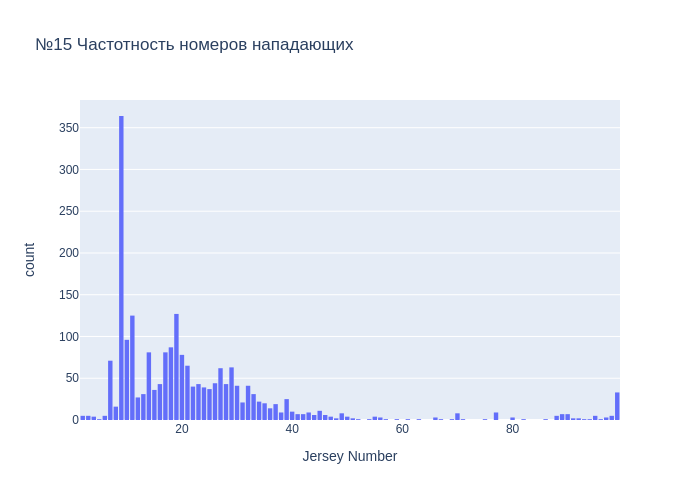

In [35]:
#Построение гистограммы
df_tmp=df[df['Position']=='ST']
fig = px.histogram(df_tmp, x="Jersey Number", nbins=int(max(df['Jersey Number'].tolist())), title="№15 Частотность номеров нападающих")
fig.update_layout(bargap=0.2)
fig.show('png')

№15 Чаще всего нападающие играют под номерами 9 и 11

16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


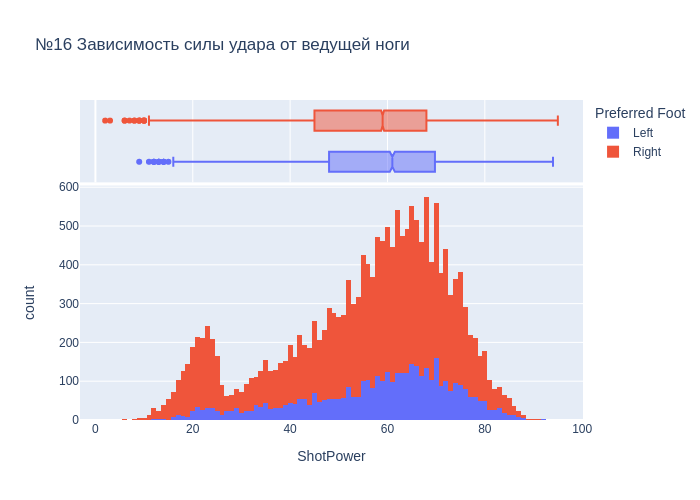

In [36]:
#Удаление строк со значением Nan
df_tmp=df.copy()
df_tmp=df_tmp[~df_tmp['Preferred Foot'].isna()]

#Построение гистограммы с диаграммой размаха
fig = px.histogram(df_tmp, x='ShotPower', color='Preferred Foot', marginal="box", hover_data=df.columns, title="№16 Зависимость силы удара от ведущей ноги")
fig.show('png')

№16 Зависимость есть: в среднем у левшей более сильные удары

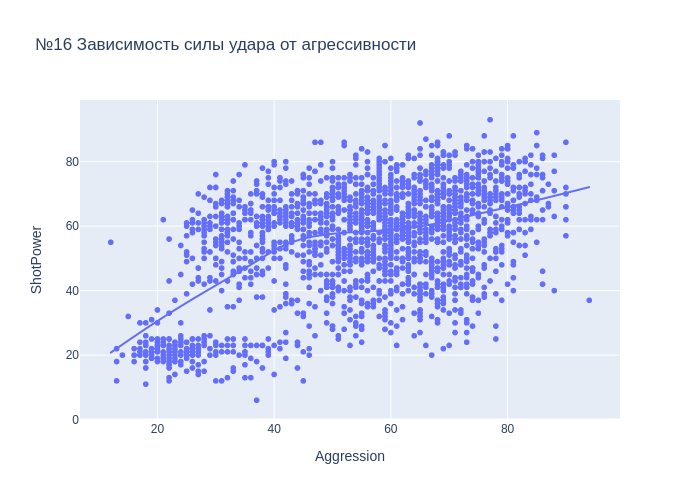

In [37]:
#Построение диаграммы рассеяния
fig = px.scatter(df.sample(2000), x='Aggression', y="ShotPower", trendline="lowess", title="№16 Зависимость силы удара от агрессивности")
fig.show('png')

№16 Есть зависимость силы удара от агрессивности

17. Найдите суммарную стоимость игроков в каждом клубе
18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

In [38]:
#Удаление строк со значением Nan
df_tmp=df.copy()
df_tmp=df_tmp[~df_tmp['Club'].isna()]

#Перевод стоимости игрока из строки в числовое значение
df_tmp['Value']=pd.to_numeric(df_tmp['Value'].str.replace("K", "000", regex=True).str.replace(r"[^\d\.]", "", regex=True), errors='coerce')
df_tmp.loc[df_tmp["Value"]<1000,"Value"] *= 1000000

#Создание вспомогательной базы данных: содержит клуб и суммарную стоимость его игроков
sum_value=[]
for club in df_tmp["Club"].unique().tolist():
  sum_value.append(df_tmp.loc[df_tmp["Club"] == club, 'Value'].sum())
df_sum = pd.DataFrame({"Club": df_tmp["Club"].unique().tolist(), "Sum Value": sum_value})

#Сортируем базу данных по суммарной стоимости клуба
df_sum=df_sum.sort_values(by="Sum Value", axis=0, ascending=False)

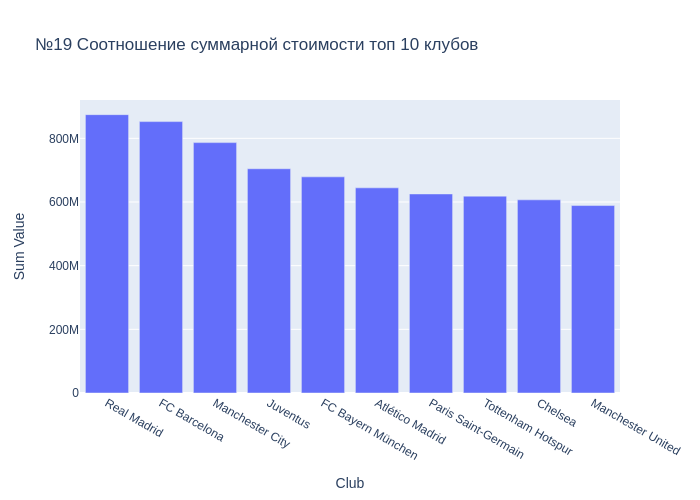

In [39]:
#Построение гистограммы
fig = px.bar(df_sum.head(10), x='Club', y='Sum Value', title="№19 Соотношение суммарной стоимости топ 10 клубов")
fig.show('png')

19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью? 

In [40]:
df_tmp=df.copy()

#Перевод Release Clause игрока из строки в числовое значение
df_tmp['Release Clause']=pd.to_numeric(df_tmp['Release Clause'].str.replace("K", "000", regex=True).str.replace(r"[^\d\.]", "", regex=True), errors='coerce')
df_tmp.loc[df_tmp["Release Clause"]<1000,"Release Clause"] *= 1000000

#Перевод стоимости игрока из строки в числовое значение
df_tmp['Value']=pd.to_numeric(df_tmp['Value'].str.replace("K", "000", regex=True).str.replace(r"[^\d\.]", "", regex=True), errors='coerce')
df_tmp.loc[df_tmp["Value"]<1000,"Value"] *= 1000000

#Перевод Contract Valid Until в тип данных datetime
df_tmp['Contract Valid Until']=pd.to_datetime(df_tmp['Contract Valid Until'])

#Перевод Joined в тип данных datetime
df_tmp['Joined']=pd.to_datetime(df_tmp['Joined'])

In [41]:
#Создание вспомогательной базы данных: содержит длительность контракта, стоимость, Release Clause и имя игрока
df_dur = pd.DataFrame({"Name": df_tmp["Name"].tolist(),"Value": df_tmp["Value"].tolist(), "Release Clause": df_tmp["Release Clause"].tolist(), "Contract Duration (in days)": (df_tmp['Contract Valid Until']-df_tmp['Joined']).dt.days.tolist()})
df_dur[df_dur["Contract Duration (in days)"]<0]=0

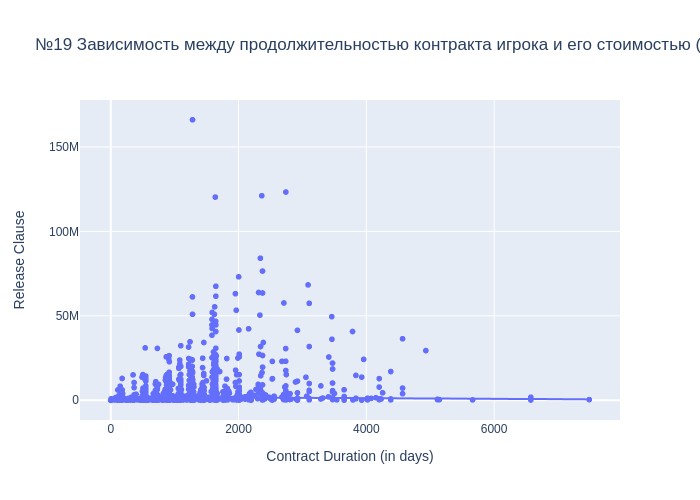

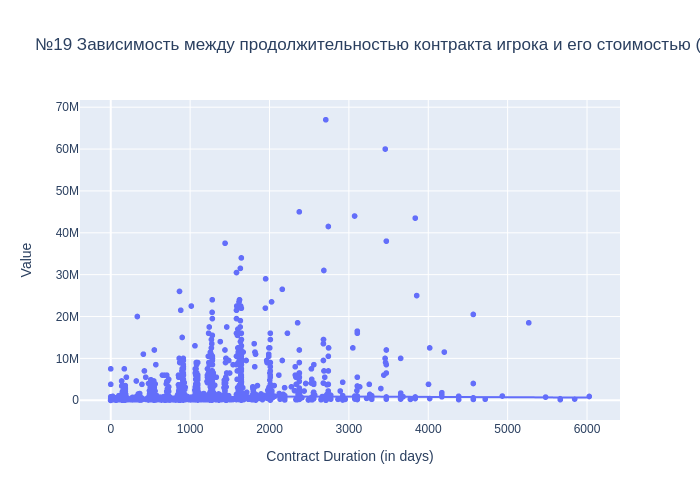

In [42]:
#Построение диаграммы рассеяния для Release Clause
fig = px.scatter(df_dur.sample(2000), x='Contract Duration (in days)', y="Release Clause", trendline="lowess", title="№19 Зависимость между продолжительностью контракта игрока и его стоимостью (если имеется ввиду Release Clause)")
fig.show('png')

#Построение диаграммы рассеяния для Value
fig = px.scatter(df_dur.sample(2000), x='Contract Duration (in days)', y="Value", trendline="lowess", title="№19 Зависимость между продолжительностью контракта игрока и его стоимостью (если имеется ввиду Value)")
fig.show('png')

№ 19 При средней продолжительности контракта наибольшая стоимость (Value) => зависимости нет  
      Чем дольше контракт, тем больше Release Clause => зависимость есть

20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

In [43]:
#Перевод Contract Valid Until в тип данных datetime, при этом оставляем только год
df_tmp=df.copy()
df_tmp['Contract Valid Until']=pd.to_datetime(df_tmp['Contract Valid Until']).dt.year

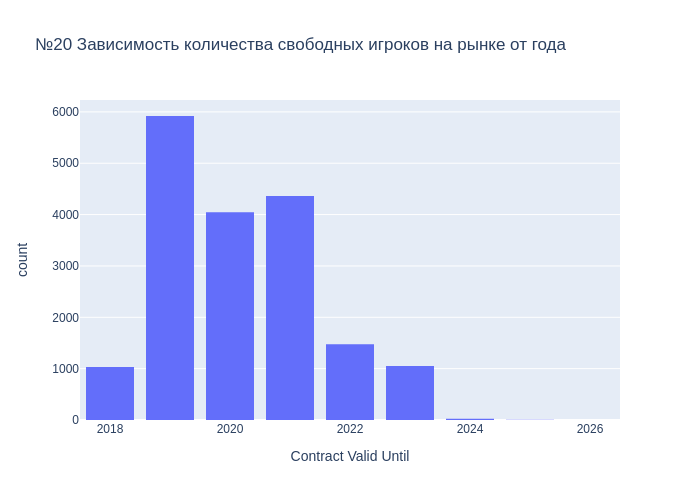

In [44]:
#Построение гистограммы
fig = px.histogram(df_tmp, x='Contract Valid Until', title="№20 Зависимость количества свободных игроков на рынке от года")
fig.update_layout(bargap=0.2)
fig.show('png')

№20 В 2019 году

21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
22. Всегда ли молодые игроки обладают большим потенциалом?

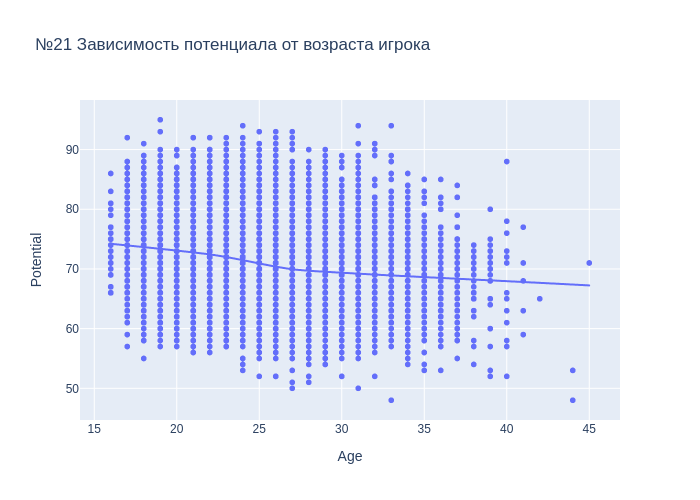

In [45]:
#Построение диаграммы рассеяния
fig = px.scatter(df, x="Age", y="Potential", trendline="lowess", title="№21 Зависимость потенциала от возраста игрока")
fig.show('png')

№21 Зависимость потенциала от возраста есть  
№22 Молодые игроки не всегда обладают большим потенциалом, однако их потенциал больше, чем у большой асти игроков средних лет

23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
24. Когда у игроков "пик" карьеры?
25. Игроков какого возраста больше всего с рейтингом 90+?

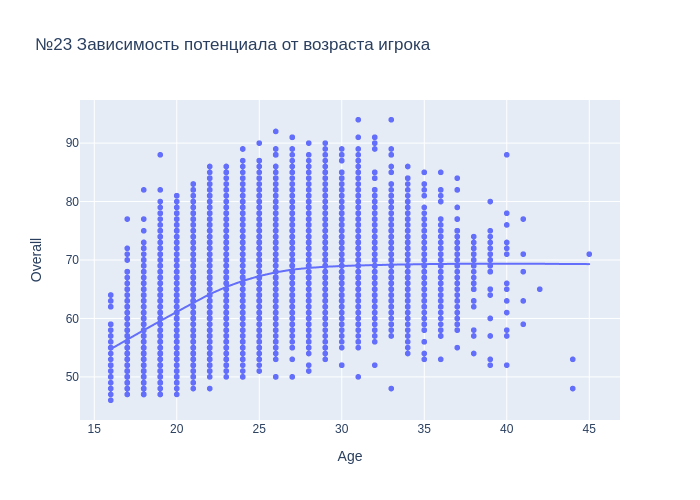

In [46]:
#Построение диаграммы рассеяния
fig = px.scatter(df, x="Age", y="Overall", trendline="lowess", title="№23 Зависимость потенциала от возраста игрока")
fig.show('png')

№23 Заувисимость есть  
№24 Пик карьеры у игроков: 31 год

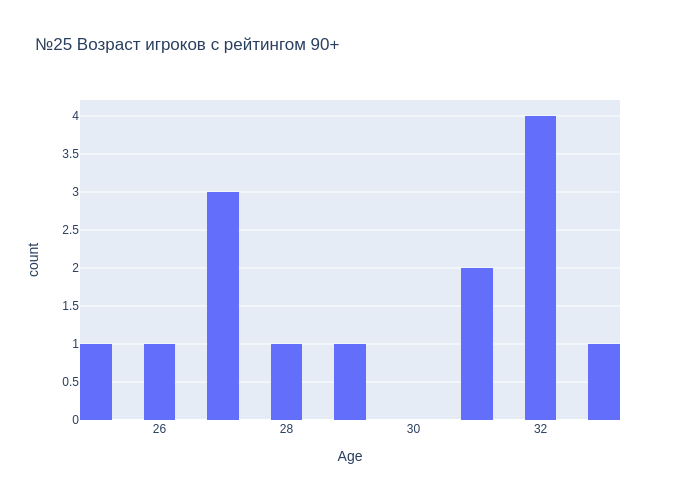

In [47]:
#Построение гистограммы
df_tmp=df[df['Overall']>=90]
fig = px.histogram(df_tmp, x="Age", nbins=int(max(df_tmp['Age'].tolist())), title="№25 Возраст игроков с рейтингом 90+")
fig.show('png')

№25 Среди игроков, рейтинг которых больше 90, больше всего 32-хлетних

26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

In [48]:
#Перевод Wage игрока из строки в числовое значение
df_tmp=df.copy()
df_tmp['Wage']=pd.to_numeric(df_tmp['Wage'].str.replace("K", "000", regex=True).str.replace(r"[^\d\.]", "", regex=True), errors='coerce')
df_tmp.loc[df_tmp["Wage"]<1000,"Wage"] *= 1000000

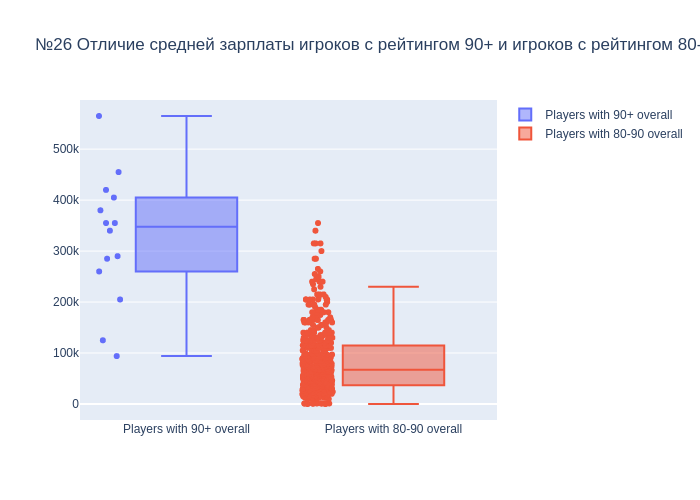

In [49]:
#Построение диаграммы размаха
fig = go.Figure()
fig.add_trace(go.Box(y=df_tmp.loc[df_tmp['Overall']>=90, "Wage"].tolist(), name="Players with 90+ overall", boxpoints='all'))
fig.add_trace(go.Box(y=df_tmp.loc[(df_tmp['Overall']>=80) & (df_tmp['Overall']<90), "Wage"].tolist(), name="Players with 80-90 overall", boxpoints='all'))
fig.update_layout(title="№26 Отличие средней зарплаты игроков с рейтингом 90+ и игроков с рейтингом 80-90")
fig.show('png')

№26 Средняя зарплата отличается на 280.5k

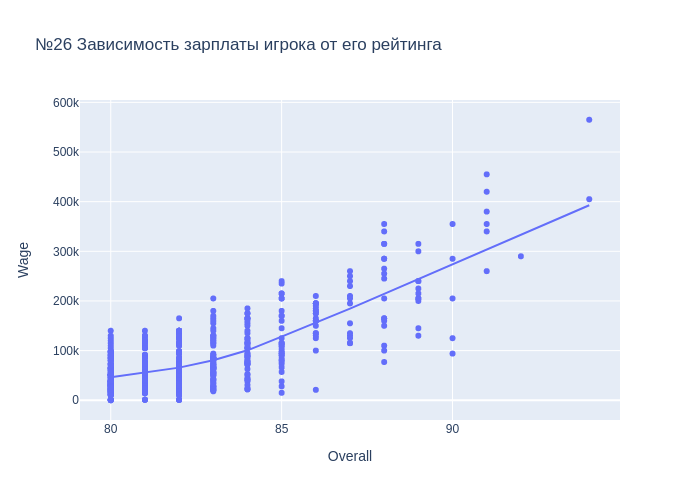

In [50]:
#Построение диаграммы рассеяния
df_over80=df_tmp[df_tmp["Overall"]>=80]
fig = px.scatter(df_over80, x='Overall', y='Wage', trendline="lowess", title="№26 Зависимость зарплаты игрока от его рейтинга")
fig.show('png')